# **Ecommerce Sales and Growth in 2014 and 2015**

## **Contents**


1. [Project Introduction](1.-Project-Introduction)  
2. [Data Preparation](-Data-Preparation)  
3. [Data Analysis and Visualization](-Data-Analysis-and-Visualization)  
4. [Conclusion](-Conclusion)

### **1. Project Introduction**

**Overview**

This project uses data from the [U.S. Census Bureau's 2015 Annual Retail Trade Survey](https://www.census.gov/data/tables/2015/econ/e-stats/2015-e-stats.html). The survey collected data on the ecommerce and total sales in the U.S. retailing sector among various merchandise categories. Data was collected on the years 2014 and 2015. The major focus of this project is to display the author's capacity to clean and wrangle data. A [2020 survey by Anaconda](https://www.datanami.com/2020/07/06/data-prep-still-dominates-data-scientists-time-survey-finds/#:~:text=Data%20scientists%20spend%20about%2045,data%20scientists%20conducted%20by%20Anaconda) revealed that data scientist spend about 26% of their time on data cleansing. Assuring that data is cleaned and structured appropriately is a vital first step in carrying out analysis. 

**Objectives**

- Provide a general summary of ecommerce sales by merchandise line in the U.S. retailing sector between 2014 and 2015
- Answer questions regarding highest earning and fastest growing ecommerce lines between 2014 and 2015
- Demonstrate capacity to clean, wrangle, and visualize data in python
- Demonstrate ability with the following python libraries: pandas, seaborn

**Questions**
1. Which three merchandise lines had the highest ecommerce sales in 2014?
2. Which three merchandise lines had the highest ecommerce sales in 2015?
3. What were the three fastest growing merchandise lines among ecommerce sales between 2014 and 2015?
4. How much did ecommerce sales grow as a proportion of total sales in 2014 and 2015?

### **2. Data Preparation

Let's begin by importing our libraries.

In [159]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

The original file was imported first in order to show the original 'messy' data

In [160]:
# original file
file_original = "C:\\Users\\Phillip's PC\\ecom_by_merch_line_2015.csv"
df_original = pd.read_csv(file_original)    
df_original.head()

,Table 5. U.S. Electronic Shopping and Mail-Order Houses (NAICS 4541) - Total and E-commerce Sales by Merchandise Line1: 2015 and 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,[Estimates are based on data from the 2015 Ann...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Merchandise Lines,Value of Sales,NaN,NaN,NaN,Y/Y Percent Change,NaN,E-commerce as Percent of Total Sales,Percent Distribution,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total Sales,E-commerce Sales,NaN,NaN,NaN
3,NaN,2015,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Several steps were taken during the import stage to already begin making the data tidier.

In [161]:
# create a header and store as 'header'
header = ['merchandise_line', 'total_sales_2015', 'ecommerce_sales_2015', 'total_sales_2014', 'ecommerce_sales_2014']

# create a new file
file = "C:\\Users\\Phillip's PC\\ecom_by_merch_line_2015.csv"

# re-import data and store as df, set header as 'header'
df = pd.read_csv(file, skiprows = 9, usecols = [i for i in range(5)], names = header, header = 0)                 
df.head()

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books and magazines,"12,583","11,648","11,879","10,828"
1,Clothing and clothing accessories (includes fo...,"58,188","52,128","53,751","46,830"
2,Computer hardware,S,"17,459","29,527","16,884"
3,Computer software,S,S,"9,594","6,491"
4,"Drugs, health aids, and beauty aids",S,"21,469","93,586","19,112"


In [162]:
df.shape

(26, 5)

In [163]:
df.dtypes

merchandise_line        object
total_sales_2015        object
ecommerce_sales_2015    object
total_sales_2014        object
ecommerce_sales_2014    object
dtype: object

On import, we dealt with the empty rows at the top of the data frame as well as the renaming the columns appropriately. Below, we will examine and tidy the tail.

In [164]:
df.tail(20)

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
6,"Food, beer, and wine","9,841","7,579","8,636","6,349"
7,Furniture and home furnishings,"32,369","28,883","26,599","23,311"
8,Music and videos,S,S,S,S
9,Office equipment and supplies,"10,613","9,236",S,S
10,Sporting goods,"13,104","11,681","10,910","9,347"
11,"Toys, hobby goods, and games","12,110","10,682","10,623","8,997"
12,Other merchandise2,"68,378","52,893","55,104","41,543"
13,Nonmerchandise receipts3,"29,153","26,374","25,500","22,317"
14,NaN,NaN,NaN,NaN,NaN
15,S - Estimate does not meet publication standar...,NaN,NaN,NaN,NaN


As we can see, the tail end of the data frame has several empty rows. If we examine the original file we see that these are notes relating to the some of the missing values, information about the 'other merchandise' and 'non-merchandise' lines, the sources, and the data source. These are all unneeded and so we remove them.

In [165]:
# drip empty / unwatned columns of df's tail
df = df.drop(df.index[14:26])
df.tail(20)

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books and magazines,"12,583","11,648","11,879","10,828"
1,Clothing and clothing accessories (includes fo...,"58,188","52,128","53,751","46,830"
2,Computer hardware,S,"17,459","29,527","16,884"
3,Computer software,S,S,"9,594","6,491"
4,"Drugs, health aids, and beauty aids",S,"21,469","93,586","19,112"
5,Electronics and appliances,"30,016","26,050","28,158","24,234"
6,"Food, beer, and wine","9,841","7,579","8,636","6,349"
7,Furniture and home furnishings,"32,369","28,883","26,599","23,311"
8,Music and videos,S,S,S,S
9,Office equipment and supplies,"10,613","9,236",S,S


THe row at index 8 is removed because there is no data for it.

In [166]:
# remove row at index 8 (no data)
df.drop(df.index[8], inplace = True)
df

# reset index to 0
df = df.reset_index(drop = True)

In [167]:
df

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books and magazines,"12,583","11,648","11,879","10,828"
1,Clothing and clothing accessories (includes fo...,"58,188","52,128","53,751","46,830"
2,Computer hardware,S,"17,459","29,527","16,884"
3,Computer software,S,S,"9,594","6,491"
4,"Drugs, health aids, and beauty aids",S,"21,469","93,586","19,112"
5,Electronics and appliances,"30,016","26,050","28,158","24,234"
6,"Food, beer, and wine","9,841","7,579","8,636","6,349"
7,Furniture and home furnishings,"32,369","28,883","26,599","23,311"
8,Office equipment and supplies,"10,613","9,236",S,S
9,Sporting goods,"13,104","11,681","10,910","9,347"


Next, we're going to deal with the cells with an 'S' in them. According to the notes 'Estimate does not meet publication standards because of high sampling variability (coefficient of variation is greater than 30%) or poor response quality (total quantity response rate is less than 50%)'. 

Instead of removing the row completely (which is an option), we will instead make the value equal to the previous (or next) year. This will allow us to include the merchandise line in the analysis. While maybe not completely accurate, it will serve one of the main purposes of this project - display ability to prepare data for analysis.

In [168]:
## impute values into 'S'

# computer hardware - make same as 2014 + increase of difference in ecom sales
ch = 29527 + (17459 - 16884)
ch = str(ch)
df.iloc[2, 1] = ch
 
# computer software - make the same as 2014 sales
cs = '9,594'
df.iloc[3, 1] = cs
cs2 = '6,491'
df.iloc[3, 2] = cs2

# drugs... - make same as 2014 + increase of difference in ecom sales
d = 93586 + (21469 - 19112)
d = str(d)
df.iloc[4, 1] = d

# office equipment and supplies - make the same as 2015 sales
oes = '10,613'
df.iloc[8, 3] = oes
oes2 = '9,236'
df.iloc[8, 4] = oes2

df

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books and magazines,"12,583","11,648","11,879","10,828"
1,Clothing and clothing accessories (includes fo...,"58,188","52,128","53,751","46,830"
2,Computer hardware,30102,"17,459","29,527","16,884"
3,Computer software,"9,594","6,491","9,594","6,491"
4,"Drugs, health aids, and beauty aids",95943,"21,469","93,586","19,112"
5,Electronics and appliances,"30,016","26,050","28,158","24,234"
6,"Food, beer, and wine","9,841","7,579","8,636","6,349"
7,Furniture and home furnishings,"32,369","28,883","26,599","23,311"
8,Office equipment and supplies,"10,613","9,236","10,613","9,236"
9,Sporting goods,"13,104","11,681","10,910","9,347"


Here, we will clean up the merchandise labels to be more uniform.

In [169]:
# get unique value of merchandise_line column
df.merchandise_line.unique()

array(['Books and magazines',
       'Clothing and clothing accessories (includes footwear)',
       'Computer hardware', 'Computer software',
       'Drugs, health aids, and beauty aids',
       'Electronics and appliances', 'Food, beer, and wine',
       'Furniture and home furnishings', 'Office equipment and supplies',
       'Sporting goods', 'Toys, hobby goods, and games',
       'Other merchandise2', 'Nonmerchandise receipts3'], dtype=object)

In [170]:
merchandise_line = ['books & magazines', 'clothing & accessories', 'computer hardware', 'computer software', 
                    'drugs, health aids, & beauty aids', 'electronics & appliances', 'food, beer, & wine', 
                    'home furnishings & furniture', 'office equipment & supplies','sporting goods', 
                    'toys, hobbies, & games', 'miscellaneous', 'non-merchandise receipts']

In [171]:
df['merchandise_line'] = merchandise_line
df

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,books & magazines,"12,583","11,648","11,879","10,828"
1,clothing & accessories,"58,188","52,128","53,751","46,830"
2,computer hardware,30102,"17,459","29,527","16,884"
3,computer software,"9,594","6,491","9,594","6,491"
4,"drugs, health aids, & beauty aids",95943,"21,469","93,586","19,112"
5,electronics & appliances,"30,016","26,050","28,158","24,234"
6,"food, beer, & wine","9,841","7,579","8,636","6,349"
7,home furnishings & furniture,"32,369","28,883","26,599","23,311"
8,office equipment & supplies,"10,613","9,236","10,613","9,236"
9,sporting goods,"13,104","11,681","10,910","9,347"


When naming the columns above, they were put in lowercase. Later on in the project it was decided that uppercase would look better. Instead of going through and capitalizing each word, we can use a simple one line of code.

In [172]:
# capitalize first letter of each word in
df['merchandise_line'] = df.merchandise_line.str.title()

In [173]:
df

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books & Magazines,"12,583","11,648","11,879","10,828"
1,Clothing & Accessories,"58,188","52,128","53,751","46,830"
2,Computer Hardware,30102,"17,459","29,527","16,884"
3,Computer Software,"9,594","6,491","9,594","6,491"
4,"Drugs, Health Aids, & Beauty Aids",95943,"21,469","93,586","19,112"
5,Electronics & Appliances,"30,016","26,050","28,158","24,234"
6,"Food, Beer, & Wine","9,841","7,579","8,636","6,349"
7,Home Furnishings & Furniture,"32,369","28,883","26,599","23,311"
8,Office Equipment & Supplies,"10,613","9,236","10,613","9,236"
9,Sporting Goods,"13,104","11,681","10,910","9,347"


Currently, all of our numerical data is actually the string data type. Later we will convert them to integers, but first we need to remove the commas. This comma removal and data type conversion is achieved through with several for loops.

In [174]:
##1 remove commas from 2015_total_sales column

# get amount column into a list array
amount = df['total_sales_2015']

# create an empty list
new_amount = []

# loop over elements in 'amount' and 1) remove commas 2) convert to integer
for a in amount:
    a = a.replace(',', '')
    a = int(a)
    new_amount.append(a)

# replace old 'amount' column in 'df' with 'new_amount' list
df['total_sales_2015'] = new_amount

##2 remove commas from 2015_ecommerce_sales column

# get amount column into a list array
amount = df['ecommerce_sales_2015']

# create an empty list
new_amount = []

# loop over elements in 'amount' and 1) remove commas 2) convert to integer
for a in amount:
    a = a.replace(',', '')
    a = int(a)
    new_amount.append(a)

# replace old 'amount' column in 'df' with 'new_amount' list
df['ecommerce_sales_2015'] = new_amount

##3 remove commas from 2014_total_sales column

# get amount column into a list array
amount = df['total_sales_2014']

# create an empty list
new_amount = []

# loop over elements in 'amount' and 1) remove commas 2) convert to integer
for a in amount:
    a = a.replace(',', '')
    a = int(a)
    new_amount.append(a)

# replace old 'amount' column in 'df' with 'new_amount' list
df['total_sales_2014'] = new_amount

##4 remove commas from 2015_ecommerce_sales column

# get amount column into a list array
amount = df['ecommerce_sales_2014']

# create an empty list
new_amount = []

# loop over elements in 'amount' and 1) remove commas 2) convert to integer
for a in amount:
    a = a.replace(',', '')
    a = int(a)
    new_amount.append(a)

# replace old 'amount' column in 'df' with 'new_amount' list
df['ecommerce_sales_2014'] = new_amount

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   merchandise_line      13 non-null     object
 1   total_sales_2015      13 non-null     int64 
 2   ecommerce_sales_2015  13 non-null     int64 
 3   total_sales_2014      13 non-null     int64 
 4   ecommerce_sales_2014  13 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 648.0+ bytes


Next, we will convert our data from a wide to a long format.

In [175]:
# convert 'df' into a long form 
df_long = pd.melt(df, id_vars = 'merchandise_line', 
                  value_vars = ['total_sales_2015', 'ecommerce_sales_2015','total_sales_2014', 
                                'ecommerce_sales_2014'], 
                  var_name = 'sales_type', value_name = 'amount')
df_long.head()

,merchandise_line,sales_type,amount
0,Books & Magazines,total_sales_2015,12583
1,Clothing & Accessories,total_sales_2015,58188
2,Computer Hardware,total_sales_2015,30102
3,Computer Software,total_sales_2015,9594
4,"Drugs, Health Aids, & Beauty Aids",total_sales_2015,95943


In the 'sales_type' column we want to remove the year and give it its own column 'year'

In [176]:
## remove year from 'sales_type' column and create a new column 'year'

# turn 'sales_type' into a list array and save it as 'year'
year = df_long['sales_type']
year = list(year)
print(year)

['total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014',

In [177]:
# create an empty list that will become a new column 'year'
year_column = []

for element in year:
    new_element = element[-4:]
    year_column.append(new_element)

print(year_column)

['2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014']


In [178]:
# turn 'sales_type' into a list array and save it as 'sales_type'
sales_type = df_long['sales_type']
sales_type = list(sales_type)
print(sales_type)

['total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'total_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'ecommerce_sales_2015', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'total_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014', 'ecommerce_sales_2014',

In [179]:
# create an empty list that will become a new column 'sales_type'
sales_type_column = []

for element in sales_type:
    new_element = element[:-11]
    sales_type_column.append(new_element)

print(sales_type_column)

['total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'total', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce', 'ecommerce']


In [180]:
# add 'year' and 'sales_type_column' to 'df'
df_long['year'] = year_column
df_long['sales_type'] = sales_type_column
df_long.head()

,merchandise_line,sales_type,amount,year
0,Books & Magazines,total,12583,2015
1,Clothing & Accessories,total,58188,2015
2,Computer Hardware,total,30102,2015
3,Computer Software,total,9594,2015
4,"Drugs, Health Aids, & Beauty Aids",total,95943,2015


Last, we will rearrange our columns and convert the year column to an int. data type.

In [181]:
# rearrage columns
df_long = df_long[['merchandise_line', 'sales_type', 'year', 'amount']]
df_long.head()

,merchandise_line,sales_type,year,amount
0,Books & Magazines,total,2015,12583
1,Clothing & Accessories,total,2015,58188
2,Computer Hardware,total,2015,30102
3,Computer Software,total,2015,9594
4,"Drugs, Health Aids, & Beauty Aids",total,2015,95943


In [182]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merchandise_line  52 non-null     object
 1   sales_type        52 non-null     object
 2   year              52 non-null     object
 3   amount            52 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [183]:
# convert 'year' to an integer
df_long['year'] = df_long['year'].astype(int)
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merchandise_line  52 non-null     object
 1   sales_type        52 non-null     object
 2   year              52 non-null     int32 
 3   amount            52 non-null     int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.5+ KB


And voila! We now have a clean, long data frame. We can now move on to answering some questions about it.

### **3. Data Analysis and Visualization**

In this section the 4 questions posed in the introduction are answered. The answer to the question are given first, followed by how explanation on how we arrived at this conclusion.

#### **1. Which three merch lines had the highest ecommerce sales in 2014?**

*1. Clothing & Accessories - $46,830,000,000*

*2. Electronics & Appliances - $24,234,000,000*

*3. Home Furnishings & Furniture - $23,311,000,000*

*NOTE: excludes miscellaneous and non-mechandise receipts merch lines*

In [184]:
# create a df with only ecommerce sales
is_ecom = df_long['sales_type'] == 'ecommerce'
ecom = df_long[is_ecom]

## create an alternate ecom df without two merch cats

# remove miscellaneous in merch line
no_misc = ecom['merchandise_line'] != 'Miscellaneous'
ecom1 = ecom[no_misc]

# remove non-merchandise receipts
no_non = ecom1['merchandise_line'] != 'Non-Merchandise Receipts'
ecom1 = ecom1[no_non]

ecom1.head()

,merchandise_line,sales_type,year,amount
13,Books & Magazines,ecommerce,2015,11648
14,Clothing & Accessories,ecommerce,2015,52128
15,Computer Hardware,ecommerce,2015,17459
16,Computer Software,ecommerce,2015,6491
17,"Drugs, Health Aids, & Beauty Aids",ecommerce,2015,21469


In [185]:
# create 2014 df
ecom2014 = ecom1['year'] == 2014
ecom2014 = ecom1[ecom2014]
ecom2014

ecom2014.sort_values(by = 'amount', ascending = False).head(3)

,merchandise_line,sales_type,year,amount
40,Clothing & Accessories,ecommerce,2014,46830
44,Electronics & Appliances,ecommerce,2014,24234
46,Home Furnishings & Furniture,ecommerce,2014,23311


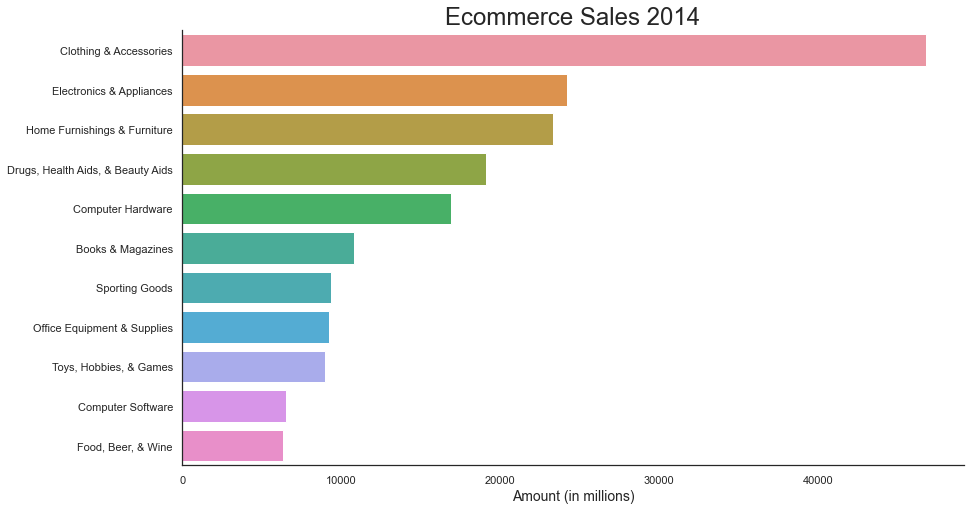

In [186]:
# set size and style
plt.figure(figsize = (14, 8))
sns.set(style = 'white')

# create barplot
fig1 = sns.barplot(x = 'amount', y = 'merchandise_line', data = ecom2014, order = ecom2014.sort_values('amount', ascending = False).merchandise_line)

# labels 
plt.xlabel('Amount (in millions)', fontsize = 14)
plt.ylabel(None)
plt.title('Ecommerce Sales 2014', fontsize = 24)

# legend

# remove top and right border from plot
sns.despine()

#### **2. Which three merch lines had the highest ecommerce sales in 2015?**

*1. Clothing & Acessories - $52,128,000,000*

*2. Home Furnishings & Furniture - $28,883,000,000*

*3. Electronics & Appliances - $26,050,000,000*

*NOTE: excludes miscellaneous and non-mechandise receipts merch lines*

In [187]:
# create an ecom2015 df
ecom2015 = ecom1['year'] == 2015
ecom2015 = ecom1[ecom2015]
ecom2015

# sort for largest
ecom2015.sort_values(by = 'amount', ascending = False).head(3)

,merchandise_line,sales_type,year,amount
14,Clothing & Accessories,ecommerce,2015,52128
20,Home Furnishings & Furniture,ecommerce,2015,28883
18,Electronics & Appliances,ecommerce,2015,26050


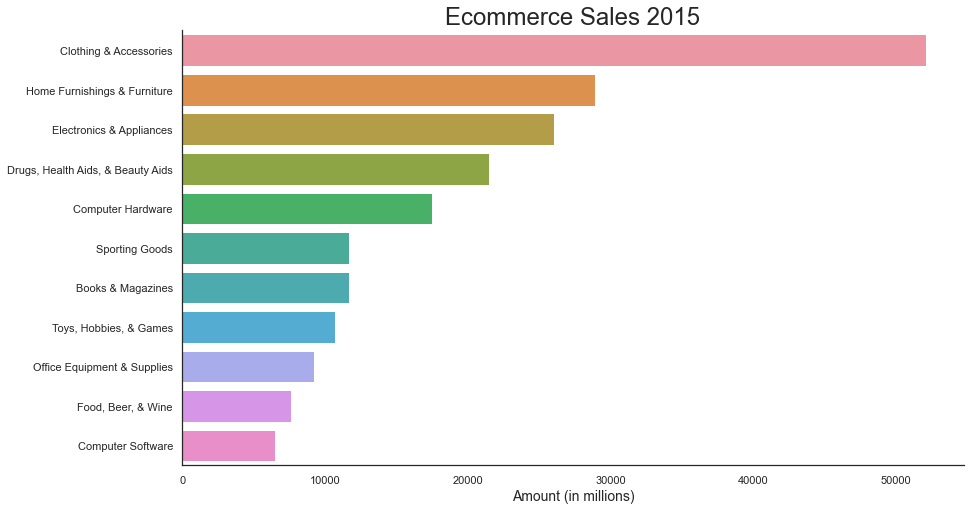

In [188]:
# set size and style
plt.figure(figsize = (14, 8))
sns.set(style = 'white')

# create barplot
fig2 = sns.barplot(x = 'amount', y = 'merchandise_line', data = ecom2015, order = ecom2015.sort_values('amount', ascending = False).merchandise_line)

# labels 
plt.xlabel('Amount (in millions)', fontsize = 14)
plt.ylabel(None)
plt.title('Ecommerce Sales 2015', fontsize = 24)

# legend

# remove top and right border from plot
sns.despine()

#### **3. What were the three fastest growing merch lines among ecommerce sales between 2014 and 2015?**

*1. Home Furnishings & Furnitre - $5,572,000,000*

*2. Clothing & Accessories - $5,298,000,000*

*3. Drug, Health Aids, & Beauty Aids - $2,3547,000,000*

*NOTE: excludes miscellaneous and non-mechandise receipts merch lines*

In [189]:
# 'df' to be used in next analysis 

# remove miscellaneous and non merch rows
df1 = df.drop(df.index[[11, 12]])
df1

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books & Magazines,12583,11648,11879,10828
1,Clothing & Accessories,58188,52128,53751,46830
2,Computer Hardware,30102,17459,29527,16884
3,Computer Software,9594,6491,9594,6491
4,"Drugs, Health Aids, & Beauty Aids",95943,21469,93586,19112
5,Electronics & Appliances,30016,26050,28158,24234
6,"Food, Beer, & Wine",9841,7579,8636,6349
7,Home Furnishings & Furniture,32369,28883,26599,23311
8,Office Equipment & Supplies,10613,9236,10613,9236
9,Sporting Goods,13104,11681,10910,9347


In [190]:
# create a growth column from 'df'
growth = df1['ecommerce_sales_2015'] - df1['ecommerce_sales_2014']
growth = list(growth)

# add 'growth' to 'ecom2015' as a new column called 'growth'
ecom2015['growth'] = growth
ecom2015.head()

# sort for largest
growth2015 = ecom2015.sort_values(by = 'growth', ascending = False)
growth2015.head(3)

<ipython-input-190-0c5c898b54a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom2015['growth'] = growth


,merchandise_line,sales_type,year,amount,growth
20,Home Furnishings & Furniture,ecommerce,2015,28883,5572
14,Clothing & Accessories,ecommerce,2015,52128,5298
17,"Drugs, Health Aids, & Beauty Aids",ecommerce,2015,21469,2357


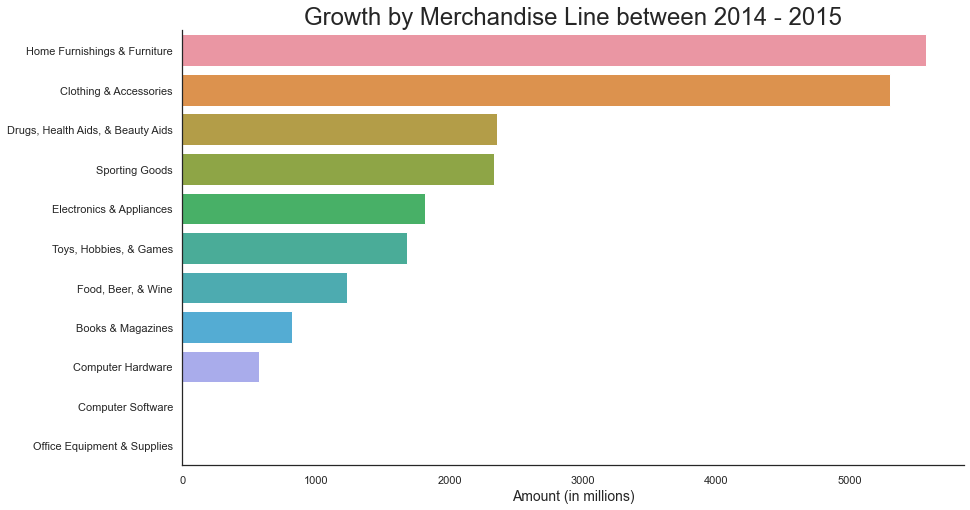

In [191]:
# set size and style
plt.figure(figsize = (14, 8))
sns.set(style = 'white')

# create barplot
fig3 = sns.barplot(x = 'growth', y = 'merchandise_line', data = growth2015)

# labels 
plt.xlabel('Amount (in millions)', fontsize = 14)
plt.ylabel(None)
plt.title('Growth by Merchandise Line between 2014 - 2015', fontsize = 24)

# remove top and right border from plot
sns.despine()

#### **4. How much did ecommerce sales grow as a proportion of total sales in 2014 and 2015?**

*Between 2014 and 2015 ecommerce sales increased by **3%** from **62%** of the total sales in 2014 to **65%** of the total sales in 2015.*

Here is the original dataframe we will be working with for this question.

In [192]:
df1.head()

,merchandise_line,total_sales_2015,ecommerce_sales_2015,total_sales_2014,ecommerce_sales_2014
0,Books & Magazines,12583,11648,11879,10828
1,Clothing & Accessories,58188,52128,53751,46830
2,Computer Hardware,30102,17459,29527,16884
3,Computer Software,9594,6491,9594,6491
4,"Drugs, Health Aids, & Beauty Aids",95943,21469,93586,19112


We do some math to find out the percentage of total sales ecommerce accounted for in each year, followed by the difference (aka increase in growth).

In [193]:
proportion2014 = round(df1['ecommerce_sales_2014'].sum() / df1['total_sales_2014'].sum(), 2)
proportion2015 = round(df1['ecommerce_sales_2015'].sum() / df1['total_sales_2015'].sum(), 2)
prop_increase = round(proportion2015 - proportion2014, 3) 
print(proportion2014)
print(proportion2015)
print(prop_increase)

0.62
0.65
0.03


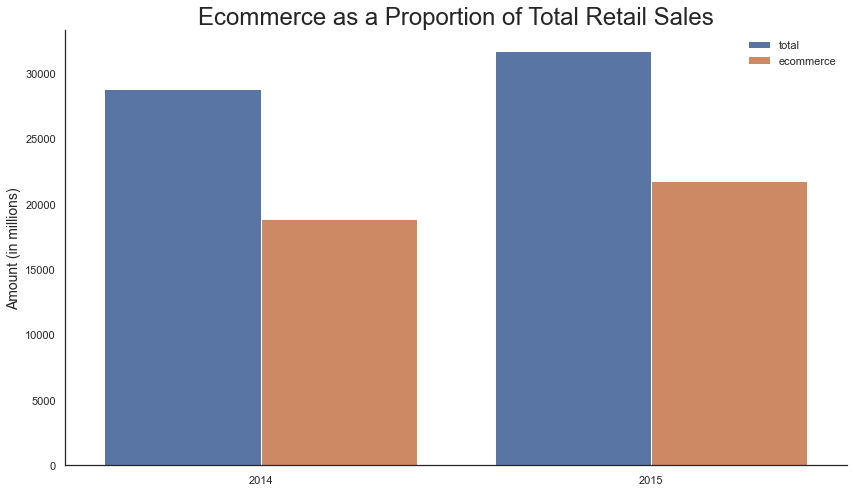

In [194]:
# set size and style
plt.figure(figsize = (14, 8))
sns.set(style = 'white')

# create barplot
fig4 = sns.barplot(x = 'year', y = 'amount', hue = 'sales_type', data = df_long, ci = None)

# labels 
plt.xlabel(None)
plt.ylabel('Amount (in millions)', fontsize = 14)
plt.title('Ecommerce as a Proportion of Total Retail Sales', fontsize = 24)

# legend
fig4.legend(frameon = False)

# remove top and right border from plot
sns.despine()

### **4. Conclusion**

In the project, the following findings were revealed:

1. The highest earning ecommerce merchandise lines of 2014 were: **Clothing & Accessories** *(46,830,000,000)*, **Electronics & Appliances** *(24,234,000,000)*, and **Home Furnishings & Furniture** *(23,311,000,000)*.  

2. The highest earning ecommerce merchandise lines of 2015 were: **Clothing & Accessories** *(52,128,000,000)*, **Home Furnishings & Furniture** *(28,883,000,000)*, and **Electronics & Appliances** *(26,050,000,000)*.

3. The ecommerce merchandise lines which grew the most from 2014 to 2015 were: **Home Furnishings & Furnitre** *(5,572,000,000)*, **Clothing & Accessories** *(5,298,000,000)*, and **Drug, Health Aids, & Beauty Aids** *(2,3547,000,000)*.

4. Between 2014 and 2015 ecommerce sales increased by **3%** from **62%** of the total sales in 2014 to **65%** of the total sales in 2015.

#### **Sources**

#### **Data Source**

https://www.census.gov/data/tables/2015/econ/e-stats/2015-e-stats.html

**Anaconda Survey**

https://www.datanami.com/2020/07/06/data-prep-still-dominates-data-scientists-time-survey-finds/#:~:text=Data%20scientists%20spend%20about%2045,data%20scientists%20conducted%20by%20Anaconda